# Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Открываем файл и изучаем общую информацию

In [2]:
#Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

#Открываем файлы
calls = pd.read_csv('datasets/calls.csv')
internet = pd.read_csv('datasets/internet.csv')
messages = pd.read_csv('datasets/messages.csv')
users = pd.read_csv('datasets/users.csv')
tariffs = pd.read_csv('datasets/tariffs.csv')

#Смотрим общую информацию
for data in [calls, internet, messages, users, tariffs]:
    print(data.info())
    print()
    display(data.head())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None



,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None



,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None



,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None



,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В нашем распоряжении данные 500 клиентов. В столбцах с датой и временим нужно заменить тип данных на временой. 
Пропуски в churn_date обозначают, что тариф ещё действовал на момент выгрузки данных. Так же нужно округлить значения минут разговора каждого звонка и гигабайт использованного интернет-трафика по итогу месяца в большую сторону.

## Подготавливаем данные

### Приведем данные к нужным типам и посмотрим на ошибки

In [3]:
# Заменим тип данных, обозначающих дату, со строчного на временной:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

# Дообавление столбца с месяцем
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

# Округляем минуты разговора каждого звонка в большую сторону
calls['duration'] = calls['duration'].apply(np.ceil)

zero_calls = calls.query('duration == 0')
zero_calls_percent = len(zero_calls) / len(calls)
print('Количество звонков продолжительностью 0 секунд:', zero_calls['duration'].count())
print('Отношение количества пропущенных звонков к количеству всех звонков: {:.2%}'.format(zero_calls_percent))

Количество звонков продолжительностью 0 секунд: 39613
Отношение количества пропущенных звонков к количеству всех звонков: 19.55%


В данных есть звонки с нулевой продолжительностью.
Это не ошибка: нулями обозначены пропущенные звонки.

In [4]:
zero_internet = internet.query('mb_used == 0')
zero_internet_percent = len(zero_internet) / len(internet)
print('Количество сессий без расхода трафика:', zero_internet['mb_used'].count())
print('Отношение количества сессий без расхода трафика к количеству всех сессий: {:.2%}'.format(zero_internet_percent))

Количество сессий без расхода трафика: 19598
Отношение количества сессий без расхода трафика к количеству всех сессий: 13.12%


В данных есть интернет сессии с нулемым(околонулевым) трафиком. Можно предположить, что это микросессии на подобии получения пуш-уведомлени, когда телефон ночью получает уведомление и сразу засыпает. Такое уведомление может занимать допустим несколько килобайт. Соответственно мегабайты стремятся к нулю. Возможно сам оператор округляет такие микросессии к нулю. Так же можно предположить, что в тариф входит бесплатное пользование определенными партнерскими приложениями, чей трафик не учитывается.

Нулевые значения я не буду удалять и трогать, потому что в сводных таблицах среднее будет вычисляться при делении суммы на количество пользователей, а не на количество сессий.

### Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам.
- количество отправленных сообщений по месяцам.
- объем израсходованного интернет-трафика по месяцам.
- помесячную выручку с каждого пользователя.

In [5]:
# Звонки
calls_per_month = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum'])
calls_per_month.columns=['calls_duration']
calls_per_month

calls_duration
user_id month                
1000    5               159.0
        6               172.0
        7               340.0
        8               408.0
        9               466.0
...                       ...
1498    10              247.0
1499    9                70.0
        10              449.0
        11              612.0
        12              492.0

[3174 rows x 1 columns]

In [6]:
# Интеренет трафик
mb_used_per_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
mb_used_per_month.columns=['mb_used_sum']
mb_used_per_month

mb_used_sum
user_id month             
1000    5          2253.49
        6         23233.77
        7         14003.64
        8         14055.93
        9         14568.91
...                    ...
1498    10        20579.36
1499    9          1845.75
        10        17788.51
        11        17963.31
        12        13055.58

[3203 rows x 1 columns]

In [7]:
# Сообщения
messages_per_month = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')
messages_per_month.columns=['msg_count']
messages_per_month

msg_count
user_id month           
1000    5             22
        6             60
        7             75
        8             81
        9             57
...                  ...
1498    10            42
1499    9             11
        10            48
        11            59
        12            66

[2717 rows x 1 columns]

In [8]:
# Обьеденим все данные в одну таблицу
users_pivot = calls_per_month.join([mb_used_per_month, messages_per_month], how='outer')
users_pivot

calls_duration  mb_used_sum  msg_count
user_id month                                        
1000    5               159.0      2253.49       22.0
        6               172.0     23233.77       60.0
        7               340.0     14003.64       75.0
        8               408.0     14055.93       81.0
        9               466.0     14568.91       57.0
...                       ...          ...        ...
1489    8                 NaN     11050.56       17.0
        9                 NaN     17206.30       32.0
        10                NaN     19559.44       21.0
        11                NaN     17491.56       20.0
        12                NaN     17322.51       35.0

[3214 rows x 3 columns]

In [9]:
# Смотрим пропуски появившиеся при объеденении таблиц
users_pivot.isnull().sum()

calls_duration     40
mb_used_sum        11
msg_count         497
dtype: int64

In [10]:
# Заменяем пропуски на нули
users_pivot.fillna(0, inplace=True)
users_pivot.isnull().sum()

calls_duration    0
mb_used_sum       0
msg_count         0
dtype: int64

In [11]:
# Добавим столбец с обозначением тарифа
users_pivot = users_pivot.join(users.loc[:,['user_id', 'tariff']].set_index('user_id'), how='outer')
users_pivot

calls_duration  mb_used_sum  msg_count tariff
user_id month                                               
1000    5               159.0      2253.49       22.0  ultra
        6               172.0     23233.77       60.0  ultra
        7               340.0     14003.64       75.0  ultra
        8               408.0     14055.93       81.0  ultra
        9               466.0     14568.91       57.0  ultra
...                       ...          ...        ...    ...
1489    8                 0.0     11050.56       17.0  smart
        9                 0.0     17206.30       32.0  smart
        10                0.0     19559.44       21.0  smart
        11                0.0     17491.56       20.0  smart
        12                0.0     17322.51       35.0  smart

[3214 rows x 4 columns]

In [12]:
# Расчитаем помесячную выручку с каждого пользователя
def det_revenue(row):
    duration = row['calls_duration']
    mb_used = row['mb_used_sum']
    messages = row['msg_count']
    tariff = row['tariff']
    
    if tariff == 'smart':
        extra_duration = duration - tariffs.loc[0, 'minutes_included']
        extra_gb = np.ceil((mb_used - tariffs.loc[0, 'mb_per_month_included'])/1024)
        extra_messages = messages - tariffs.loc[0, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_gb < 0: extra_gb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (tariffs.loc[0, 'rub_per_message'] * extra_messages + 
                   tariffs.loc[0, 'rub_per_gb'] * extra_gb + 
                   tariffs.loc[0, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[0, 'rub_monthly_fee']
                  ) 
    else:
        extra_duration = duration - tariffs.loc[1, 'minutes_included']
        extra_gb = np.ceil((mb_used - tariffs.loc[1, 'mb_per_month_included']) / 1024)
        extra_messages = messages - tariffs.loc[1, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_gb < 0: extra_gb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (tariffs.loc[1, 'rub_per_message'] * extra_messages + 
                   tariffs.loc[1, 'rub_per_gb'] * extra_gb + 
                   tariffs.loc[1, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[1, 'rub_monthly_fee']
                  )

users_pivot['revenue'] = users_pivot.apply(det_revenue, axis=1)
users_pivot.head(17)

calls_duration  mb_used_sum  msg_count tariff  revenue
user_id month                                                        
1000    5               159.0      2253.49       22.0  ultra   1950.0
        6               172.0     23233.77       60.0  ultra   1950.0
        7               340.0     14003.64       75.0  ultra   1950.0
        8               408.0     14055.93       81.0  ultra   1950.0
        9               466.0     14568.91       57.0  ultra   1950.0
        10              350.0     14702.49       73.0  ultra   1950.0
        11              338.0     14756.47       58.0  ultra   1950.0
        12              333.0      9817.61       70.0  ultra   1950.0
1001    11              430.0     18429.34        0.0  smart   1150.0
        12              414.0     14036.66        0.0  smart    550.0
1002    6               117.0     10856.82        4.0  smart    550.0
        7               214.0     17580.10       11.0  smart   1150.0
        8               289.0     20319.26       13.0  smart   1550.0
        9               206.0     16691.08        4.0  smart    950.0
        10              212.0     13888.25       10.0  smart    550.0
        11              243.0     18587.28       16.0  smart   1350.0
        12              236.0     18113.73       12.0  smart   1150.0

## Проанализируем данные

In [13]:
# Выясним сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям 
# каждого тарифа в месяц. Используем медиану.
medians_per_month = users_pivot.pivot_table(index='user_id', 
                        values=['calls_duration', 'mb_used_sum', 'msg_count'], 
                        aggfunc='median')

medians_per_month = medians_per_month.join(users.loc[:,['user_id', 'tariff']].set_index('user_id'), how='outer')

medians_per_month.fillna(0, inplace=True)
medians_per_month

,calls_duration,mb_used_sum,msg_count,tariff
user_id,,,,
1000,339.0,14312.420,65.0,ultra
1001,422.0,16233.000,0.0,smart
1002,214.0,17580.100,11.0,smart
1003,824.0,11356.890,83.0,ultra
1004,132.5,17810.530,154.5,ultra
...,...,...,...,...
1495,954.0,29363.000,82.0,ultra
1496,524.0,24037.255,41.5,smart
1497,490.0,14156.080,17.0,smart


Как видно, пользователи по разному пользуются услугами: кто-то за месяц не отправляет ни одного сообщения, а кто-то проговаривает 900 минут. 
Так же нашлись 2 пользователя, которые подключили тарифы, не пользовались услугами и отключили тариф через 5-7 дней.

In [14]:
# Посчитаем среднее количество, дисперсию и стандартное отклонение
statistics = users_pivot.pivot_table(index=['tariff'], values=['calls_duration', 'mb_used_sum', 'msg_count'], 
                    aggfunc={'calls_duration': [np.mean, np.var, np.std], 
                             'mb_used_sum': [np.mean, np.var, np.std], 
                             'msg_count': [np.mean, np.var, np.std]})
statistics.round(1)

calls_duration                  mb_used_sum                        \
                 mean    std       var        mean      std          var   
tariff                                                                     
smart           417.9  190.3   36219.3     16208.4   5870.5   34462496.5   
ultra           526.6  317.6  100873.6     19468.8  10087.2  101751013.8   

       msg_count                
            mean   std     var  
tariff                          
smart       33.4  28.2   796.8  
ultra       49.4  47.8  2285.3

Из показателей можно сделать следующие выводы:

- В среднем пользователь смарт проговаривает 418 минут в месяц, а пользователь ультра - 526 минут.
- В среднем пользователь смарт использует 15.8 гб. трафика, а пользователь тарифа ультра - 19 гб.
- В среднем пользователь смарт отправляет 33 сообщения, а пользователь тарифа ультра - 49.
- Дисперсии тарифа ультра больше, чем у тарифа смарт, это говорит нам о большем размахе значений.

В целом пользователи тарифа "Ультра" пользуются услугами оператора более свободно, они больше разговаривают, больше проводят времени в интернете, отправляют больше сообщений, при этом среднестатистический пользователь не превышает тарифные лимиты. С другой стороны среднестатистическому пользователю тарифа "Смарт" приходится докупать 1 гб. трафика сверх лимита.

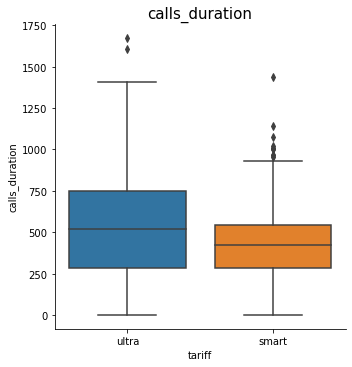

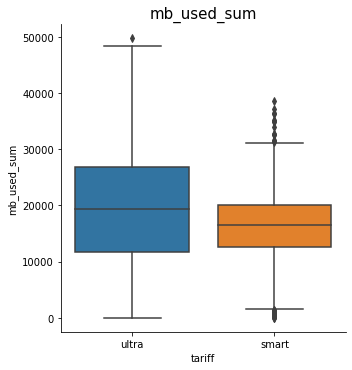

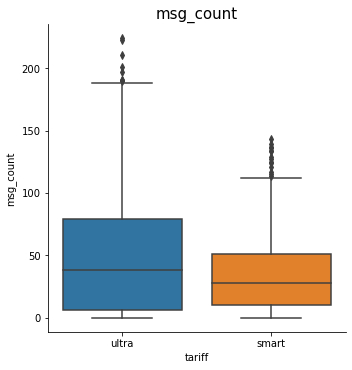

In [15]:
# Построим боксплоты
for column in ['calls_duration', 'mb_used_sum', 'msg_count']:
    sns.catplot(data=users_pivot, x='tariff', y=column, kind='box')
    plt.title(column, fontsize=15)

Минуты разговора, объем потраченного интернет-трафика и число сообщений по тарифу «Ультра» имеет больший размах по сравнению с тарифом «Смарт», и медианы по вышеперечисленным признакам также смещены в большую сторону. Кроме того, выбросов в рамках более дешевого тарифа существенно больше.

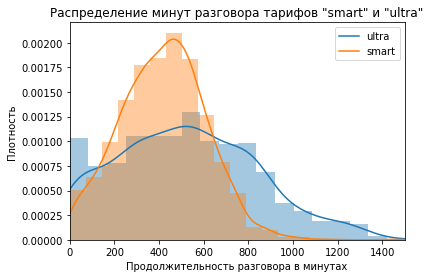

In [16]:
# Посторим гистограммы
for tariff in ['ultra', 'smart']:
    sns.distplot(users_pivot.query('tariff == @tariff')['calls_duration'], kde=True, bins=20)

plt.xlim(0,1500)
plt.title('Распределение минут разговора тарифов "smart" и "ultra"')
plt.xlabel('Продолжительность разговора в минутах')
plt.ylabel('Плотность')
plt.legend(['ultra', 'smart'])
plt.show()

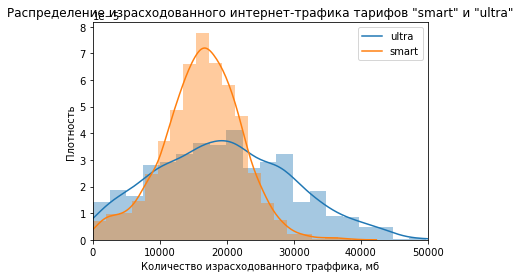

In [17]:
for tariff in ['ultra', 'smart']:
    sns.distplot(users_pivot.query('tariff == @tariff')['mb_used_sum'], kde=True, bins=20)

plt.xlim(0,50000)
plt.title('Распределение израсходованного интернет-трафика тарифов "smart" и "ultra"')
plt.xlabel('Количество израсходованного траффика, мб')
plt.ylabel('Плотность')
plt.legend(['ultra', 'smart'])
plt.show()

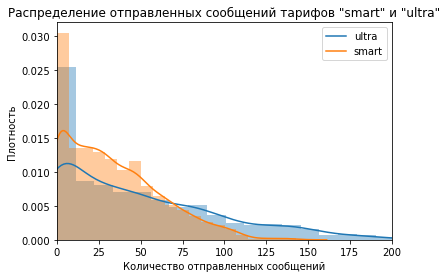

In [18]:
for tariff in ['ultra', 'smart']:
    sns.distplot(users_pivot.query('tariff == @tariff')['msg_count'], kde=True, bins=20)
    
plt.xlim(0,200)
plt.title('Распределение отправленных сообщений тарифов "smart" и "ultra"')
plt.xlabel('Количество отправленных сообщений')
plt.ylabel('Плотность')
plt.legend(['ultra', 'smart'])
plt.show()

Гистограмма распределения количества отправленных сообщений имеет ярко выраженный скос вправо. А так же своеобразный пик около нуля, который говорит нам о том, что многие пользователи практичести не используют смс-сообщения.

По гистограммам наглядно видно, что дисперсия по тарифу "Смарт" меньше, чем у пользователей с тарифом "Ультра" по всем показателям: по длительности разговора, использованному интернет-трафику и числу сообщений.

Другими словами, поведение пользователей тарифа "Ультра" более разнообразное. Пользователи дорогого тарифа более свободны в выборе того, как именно использовать объемы тарифного пакета: возможно, использование дорогого тарифа помогает им не думать о том, что в какой-то момент у них отключится интернет или закончится пакет по минутам разговора.

In [19]:
# Посчитаем, какую прибыль принесли пользователи тарифов компании:
users_pivot.pivot_table(index='tariff', values='revenue', aggfunc='sum')

,revenue
tariff,
smart,2875351.0
ultra,2039100.0


Тариф "Смарт" принес компании в 2018 году прибыль в 2,88 млн. руб, в то время как тариф "Ультра" - 2,04. Однако не стоит делать поспешных выводов, о том что тариф смарт выгоднее для компании, стоит вспомнить, что пользователей тарифа "Смарт" - 351 человек, а "Ультра" имеет всего 149 пользователей.

## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
H0 - средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».

H1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [20]:
ultra = users_pivot.query('tariff == "ultra"')['revenue']
smart = users_pivot.query('tariff == "smart"')['revenue']

alpha = 0.01

results = st.ttest_ind(
    ultra, 
    smart, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


А значит сформулированная нами альтернативная гипотеза о том, что средние наших выборок отличаются, не отвергается!

In [21]:
users_pivot.pivot_table(index='tariff', values='revenue', aggfunc='mean')

,revenue
tariff,
smart,1289.973531
ultra,2070.152284


Действительно, из таблицы видно, что средняя выручка отличается почти в два раза.

Исходя из результатов проверки гипотезы, верно утверждение, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

H0  — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

H1  — средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.

In [22]:
# добавим столбец с городом в сводную таблицу
users_pivot = users_pivot.join(users.loc[:,['user_id', 'city']].set_index('user_id'), how='outer')    
users_pivot.head(17)

calls_duration  mb_used_sum  msg_count tariff  revenue  \
user_id month                                                           
1000    5               159.0      2253.49       22.0  ultra   1950.0   
        6               172.0     23233.77       60.0  ultra   1950.0   
        7               340.0     14003.64       75.0  ultra   1950.0   
        8               408.0     14055.93       81.0  ultra   1950.0   
        9               466.0     14568.91       57.0  ultra   1950.0   
        10              350.0     14702.49       73.0  ultra   1950.0   
        11              338.0     14756.47       58.0  ultra   1950.0   
        12              333.0      9817.61       70.0  ultra   1950.0   
1001    11              430.0     18429.34        0.0  smart   1150.0   
        12              414.0     14036.66        0.0  smart    550.0   
1002    6               117.0     10856.82        4.0  smart    550.0   
        7               214.0     17580.10       11.0  smart   1150.0   
        8               289.0     20319.26       13.0  smart   1550.0   
        9               206.0     16691.08        4.0  smart    950.0   
        10              212.0     13888.25       10.0  smart    550.0   
        11              243.0     18587.28       16.0  smart   1350.0   
        12              236.0     18113.73       12.0  smart   1150.0   

                      city  
user_id month               
1000    5        Краснодар  
        6        Краснодар  
        7        Краснодар  
        8        Краснодар  
        9        Краснодар  
        10       Краснодар  
        11       Краснодар  
        12       Краснодар  
1001    11          Москва  
        12          Москва  
1002    6      Стерлитамак  
        7      Стерлитамак  
        8      Стерлитамак  
        9      Стерлитамак  
        10     Стерлитамак  
        11     Стерлитамак  
        12     Стерлитамак

In [23]:
moscow = users_pivot.query('city == "Москва"')['revenue']
regions = users_pivot.query('city != "Москва"')['revenue']

alpha = 0.01

results = st.ttest_ind(
    moscow, 
    regions, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


В данном случае нам не удалось отвергнуть нулевую гипотезу.

In [24]:
# Посчитаем средние выручки для москвы и других регионов
cities = users_pivot.copy()
cities.loc[cities.loc[:,'city'] != 'Москва', 'city'] = 'Другой город'
cities.pivot_table(index='city', values='revenue', aggfunc='mean')

,revenue
city,
Другой город,1524.936227
Москва,1546.713584


Данный статистический тест не дал возможности опровергунть исходную гипотезу о том, что доходы от пользователей из Москвы и из других регионов равны. Действительно, доходы в Московском регионе практически не отличаются от других населенных пунктов.

## Общий вывод

Хотя пользователи тарифа "Смарт" приносят на данный момент больше прибыли - 2.88 млн. руб. за 2018 год, в сравнении с тарифом "Ультра", доход от которого составил 2.04 млн. руб., средняя выручка от тарифа "Ультра" больше и составляет 2070 руб, против 1290 руб., которые показывает тариф "Смарт". 

Пользователи тарифа "Ультра" как правило не выходят за рамки лимитов, однако платят полную стоимость тарифа, в отличии от пользователей тарифа "Смарт", которым часто приходится покупать дополнительные пакеты интернет-трафика или оплачивать минуты разговора.
Так же видно, что многие пользователи совершенно не пользуются смс-сообщениями.

Средние доходы от пользователей в Москве не отличаются от доходов в других населенных пунктах: разница статистически незначима (p-значение: 0,53) и составляет 17 руб.: 1547 руб. в Москве против 1525 руб в других населенных пунктах.

Более перспективным для компании является тариф "Ультра", на момент исследования, он имеет намного меньше пользователей, однако средняя выручка, которую приносит тариф компании - больше. Но я бы посоветовал "Мегалайну" подумать и выработать промежуточное решение, которое позволяло бы клиенту более комфортно, без доп. заказов, пользоваться услугами связи. Можно рассмотреть вариант создания промежкточного тарифа, в дополнение к текущим, под названием "Медиум".